# Stacking regression example

**Example using the stacking linear regression function in the PyMLR module**

The **stacking** function provides output of regression models and summary statistics using the sklearn StackingRegressor function for ensemble modeling with any combination of sklearn base regressors which can be turned 'on' or 'off'.

The base regressors can be changed using the following are optional keyword arguments:

- lasso= 'on' (default) or 'off'        uses LassoCV
- ridge= 'on' (default) or 'off'        uses RidgeCV
- elastic= 'on' (default) or 'off'      uses ElasticNetCV
- sgd= 'on' (default) or 'off'          uses SGDRegressor
- knr= 'on' (default) or 'off'          uses KNeighborsRegressor
- svr= 'on' (default) or 'off'          uses SVR(kernel='rbf')
- gbr= 'on' (default) or 'off'          uses GradientBoostingRegressor
- tree= 'on' (default) or 'off'         uses DecisionTreeRegressor
- forest= 'on' (default) or 'off'       uses RandomForestRegressor
- mlp= 'on' or 'off' (default)          uses MLPRegressor

The meta-model may be specifed using the optional keyword argument meta:

- meta= 'linear', 'lasso', 'ridge' (default), or 'elastic' 

The **stacking** function preprocesses X by default to standardize continuous features and one-hot encode categorical features.

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes dataset by sklearn

Before running this notebook, first install the PyMLR module in your environment, if it is not already installed, using the following command:

In [1]:
# !pip install git+https://github.com/gjpelletier/PyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into training and testing subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting StackingRegressor models, please wait ...

StackingRegressor statistics of fitted ensemble model in model_outputs['stats']:

| Statistic   |   StackingRegressor |
|:------------|--------------------:|
| r-squared   |            0.659875 |
| RMSE        |           45.4614   |
| n_samples   |          353        |

Meta-model coefficients of base_regressors in model_outputs['meta_params']:

- positive intercept suggests base models under-predict target
- negative intercept suggests base models over-predict target
- positive coefficients have high importance
- coefficients near zero have low importance
- negative coefficients have counteracting importance

| Coefficient               |   StackingRegressor |
|:--------------------------|--------------------:|
| Intercept                 |          12.6969    |
| LassoCV                   |           1.0312    |
| RidgeCV                   |           1.58368   |
| ElasticNetCV              |          -2.98139   |
| SGDRegressor   

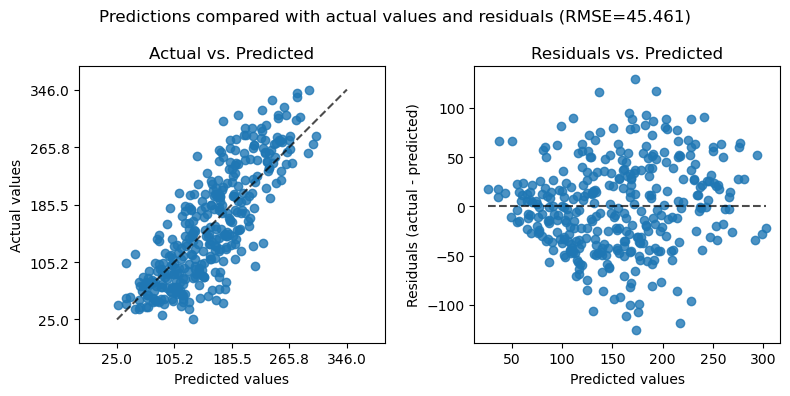

In [4]:
# Use the stacking function in the stepAIC module
from PyMLR import stacking
train_model, train_output = stacking(X_train, y_train)

## Test the model with the testing data subset

In the next step we will check how well the predictions from fitted model match samples from the testing data. To standardize the testing data we will use the same preprocess_result scaler that was used to standardize the training data to avoid data leakage between the training and testing data. We will also use the same optimized selected features that were determined during the training.


Goodness of fit to testing data in result['metrics']:

| Statistic          |   Regressor |
|:-------------------|------------:|
| R-squared          |    0.466275 |
| MSE                | 2827.76     |
| RMSE               |   53.1767   |
| Explained Variance |    0.467463 |
| MAE                |   43.1443   |
| Max Error          |  155.551    |
| MAPE               |    0.381701 |
| MSLE               |    0.176253 |
| n_samples          |   89        |



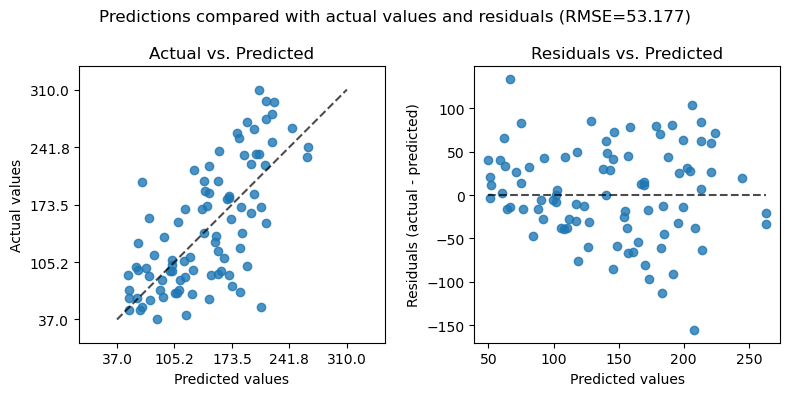

In [5]:
from PyMLR import test_model
test_output = test_model(train_model, X_test, y_test, 
    preprocess_result= train_output['preprocess_result'],
    selected_features= train_output['selected_features'])

# save the plot of predictions vs actual and residuals
test_output['fig'].savefig("StackingRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

In the next step we will fit the model using all of the X and y data. The standard scaler and encoder are recalculated by default (the user also has the option to input a previously calculated scaler/encoder from a previous preprocess_result).

Fitting StackingRegressor models, please wait ...

StackingRegressor statistics of fitted ensemble model in model_outputs['stats']:

| Statistic   |   StackingRegressor |
|:------------|--------------------:|
| r-squared   |            0.588619 |
| RMSE        |           49.3907   |
| n_samples   |          442        |

Meta-model coefficients of base_regressors in model_outputs['meta_params']:

- positive intercept suggests base models under-predict target
- negative intercept suggests base models over-predict target
- positive coefficients have high importance
- coefficients near zero have low importance
- negative coefficients have counteracting importance

| Coefficient               |   StackingRegressor |
|:--------------------------|--------------------:|
| Intercept                 |         -2.05411    |
| LassoCV                   |          1.49955    |
| RidgeCV                   |         -0.512109   |
| ElasticNetCV              |         -0.400369   |
| SGDRegressor   

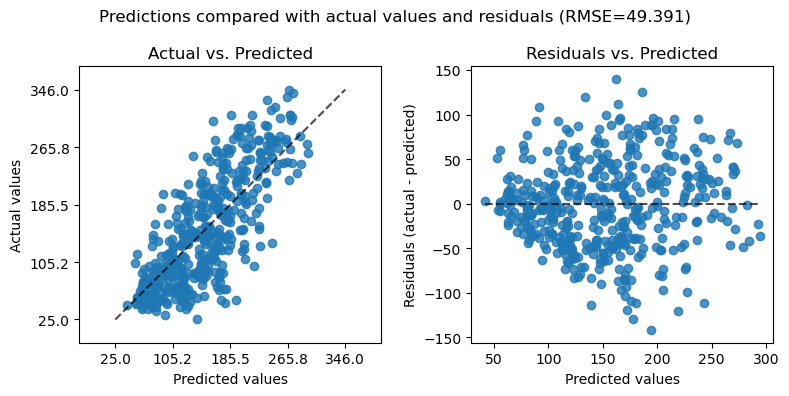

In [7]:
from PyMLR import stacking
final_model, final_output = stacking(X, y)

## User instructions

In [9]:
help(stacking)

Help on function stacking in module PyMLR:

stacking(X, y, **kwargs)
    Python function for StackingRegressor linear regression

    by
    Greg Pelletier
    gjpelletier@gmail.com
    30-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        preprocess= True,           # Apply OneHotEncoder and StandardScaler
        preprocess_result= None,    # dict of the following result from
                                    # preprocess_train if available:
                                    # - encoder          (OneHotEncoder)
                                    # - scaler           (StandardScaler)
                                    # - categorical_cols (categorical cols)
                       